<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [81]:
import pandas as pd
import re
import numpy as np

In [82]:
yelp = pd.read_json('./data/review_sample.json', lines=True)

In [83]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [84]:
# I'm going to regex and clean

# regex cleaning

cleaning = ['text']

def regex_clean(dataframe, target_list):
    
    for target in target_list:
        dataframe[target].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
        dataframe[target].apply(lambda x: re.sub(r'/n', '', x))

        
                                
import spacy
nlp = spacy.load('en_core_web_lg')
  
custom_stops = ['<', '>', '\n', '"', '\\', '|', '</div>', '<ul>', '<li>', '<p>', 'li', 'ul', 'p', ']' , '\>', '\n\n']

def tokenize(text): #lemmatize actually
    doc = nlp(text)
    lemmas = []
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            valid = True
            
            for stop in custom_stops:
                    if stop in token.text:
                        valid = False
                        break
        else:
            valid = False
                
        if valid == True:   
            lemmas.append(token.lemma_)
            
    return lemmas

<>:18: DeprecationWarning: invalid escape sequence \>
<>:18: DeprecationWarning: invalid escape sequence \>
<>:18: DeprecationWarning: invalid escape sequence \>
<ipython-input-84-d840f0308d32>:18: DeprecationWarning: invalid escape sequence \>
  custom_stops = ['<', '>', '\n', '"', '\\', '|', '</div>', '<ul>', '<li>', '<p>', 'li', 'ul', 'p', ']' , '\>', '\n\n']


In [85]:
#tokenize reviews
regex_clean(yelp, cleaning)
yelp['lemmas'] = yelp['text'].apply(tokenize)

In [86]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,lemmas
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, Lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, foot, Circus, Circus, , ..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, good, actually, guy..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3.5, 4, star, bad, $, 12.99, lunch, senior, 1..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [87]:
#I'll rejoin the lemmas so that TFIDF can read them

#de-tokenize
detokenized_doc = []
for i in range(len(yelp['lemmas'])):
    t = ' '.join(yelp['lemmas'][i])
    detokenized_doc.append(t)
    
yelp['lemma_text'] = detokenized_doc

In [88]:
# save df since this took a lot of time to lemmatize
yelp.to_csv('yelp_lemmas.csv', sep='\t', encoding='utf-8', index=False)

In [89]:
# I will tfidf vectorize then apply nn
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(yelp['lemma_text'])

In [90]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

# Fit NN on TF-IDF Vectors in dtm
nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [91]:
fake_review = """This was the worst dining experience of my life. 
The cook literally took a dump on a plate and rolled it in a bun. 
That's not food. It's not right. It was a nightmare"""

fake_dtm = tfidf.transform([fake_review])

closeness, location = nn.kneighbors(fake_dtm.todense())

In [92]:
# print out similar reviews
for (x,y), value in np.ndenumerate(location):
    print(yelp['text'].loc[value])
    print('\n')

旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。
質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 
ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。
予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。
また是非マッサージなどで伺いたいと思います。


Devin from Aptive Environmental went above and beyond! He got into every nook & cranny spraying for those pesky scorpions!!


天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來


One of the best dining experiences. More than just food and service. This place does it all right!


My friend took me to this place to try the buns. 

When we came, there was a grand opening special of 20% discount. I bought the original bun (that has cream cheese inside) and a matcha puff. 

Matcha puff had lots of filling, but it tasted more like cream cheese than matcha. 

The original bun was so tasty, there was just enough cream cheese inside the soft layer of the bun.


With the discount, I still paid $6 for the bun. This would be my occasional tre

In [93]:
# notes, this seems to be word matching, the word bun is being picked up, but the sentiment is missing
# The last review captures the nightmare vocab word
# on the whole, I think that the style of writing is being matched, rather than the sentiment behind the writing. Actually, the chinese review is quite similar
# in its style to the fake review, so this matching is structural rather than sentimental

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [94]:
yelp.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id', 'lemmas', 'lemma_text'],
      dtype='object')

In [95]:
from sklearn.model_selection import train_test_split

X = yelp['lemma_text']
y = yelp['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
# try pipeline with SGD
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

vect = tfidf
clf = SGDClassifier(max_iter=5)

# lsi = Pipeline([('vect', vect), ('svd', svd)])

pipe = Pipeline([('vect', vect), ('clf', clf)])

In [97]:
pipe.fit(X_train,y_train)

/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=5000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', l

In [98]:
pipe.score(X_test,y_test)

0.5725

In [99]:
# use Randomized search cv to optimize
from sklearn.model_selection import RandomizedSearchCV
params = {
    'vect__max_df' : (.5, .7, 1),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clf__loss' : ('hinge', 'modified_huber'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
}

rsCV = RandomizedSearchCV(estimator=pipe, param_distributions=params, 
                          cv=5, n_jobs=-1, random_state=42, verbose=1)

In [100]:
rsCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.9s finished
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=5000,
                                                              min_df=1,
                                        

In [101]:
rsCV.score(X_test, y_test)
# so that didn't work, weird

0.5135

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [102]:
# Gensim imports
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [103]:
yelp.columns.tolist()

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id',
 'lemmas',
 'lemma_text']

In [104]:
# create A Dictionary Representation of all the words in our corpus of reviews
reviews2word = corpora.Dictionary(yelp['lemmas'])

In [105]:
#remove extreme values from the dataset
reviews2word.filter_extremes(no_below=10, no_above=0.75)

In [106]:
# now we create our corpus upon which we will apply the lda
reviews_corpus = [reviews2word.doc2bow(text) for text in yelp['lemmas']]

In [107]:
# find most coherent number of topics
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = path
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=reviews2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=reviews2word, 
                                                        corpus=reviews_corpus, 
                                                        path=yelp['lemmas'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=4)


/home/nedderlander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'best1'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


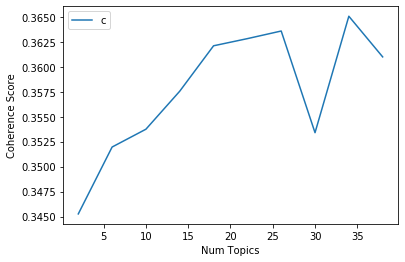

In [108]:
import matplotlib.pyplot as plt

#graph of coherence
limit = 40; start = 2; step = 4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(("coherence_values"), loc='best1')
plt.show();

In [109]:
# this shows me that the ideal number of topics should be ~ 34
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3453
Num Topics = 6  has Coherence Value of 0.352
Num Topics = 10  has Coherence Value of 0.3537
Num Topics = 14  has Coherence Value of 0.3576
Num Topics = 18  has Coherence Value of 0.3621
Num Topics = 22  has Coherence Value of 0.3628
Num Topics = 26  has Coherence Value of 0.3636
Num Topics = 30  has Coherence Value of 0.3534
Num Topics = 34  has Coherence Value of 0.3651
Num Topics = 38  has Coherence Value of 0.361


In [110]:
# latent dirchelle model with 34 topics
lda = LdaMulticore(corpus=reviews_corpus,
                   id2word=reviews2word,
                   random_state=42,
                   num_topics = 34,
                   passes=10,
                   workers=4
                  )

In [113]:
# pretty print visualization of topics
# lda.print_topics()
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]
(topics)

['  good great look recommend clean definitely movie work staff',
 'time order location coffee know come 2   service wait',
 'good drink food   order great bad night bit service',
 'hair great go cut look new love owner time recommend',
 'room hotel stay Vegas night check time bar get bathroom',
 'good food great service amazing time try steak come restaurant',
 'good definitely food nice come go friend great time gym',
 'time go food get service ask good order look take',
 'great service food friendly fast time customer staff recommend come',
 'good food chicken meat try dish beef great salad eat',
 'get   food good nice come go order bit room',
 'buffet tea lady food rude time roll fruit take come',
 '  good food great coffee flavor look nice donut meat',
 'order burger good fry sauce food get chicken try come',
 '  sushi good roll ramen food noodle time order eat',
 'come good $ order time go service know nice think',
 'good come fry get french bike love rib meal go',
 'food order w

In [114]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, reviews_corpus, reviews2word)

/home/nedderlander/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.208006 -0.050112       1        1  8.991879
11    -0.046994 -0.068864       2        1  6.931529
12     0.112071 -0.155592       3        1  5.925411
2      0.174125  0.008353       4        1  4.451449
1     -0.135407 -0.062368       5        1  4.209162
18    -0.046401 -0.097668       6        1  4.026265
20    -0.114997  0.037897       7        1  3.830891
19     0.145784 -0.018261       8        1  3.655390
10    -0.119641 -0.003539       9        1  3.557981
21    -0.077635 -0.021544      10        1  3.235233
33     0.008233 -0.033743      11        1  3.092389
23    -0.105748  0.098467      12        1  3.043036
25     0.056763  0.091174      13        1  2.941298
30    -0.135320  0.067732      14        1  2.756227
32    -0.090411 -0.031019      15        1  2.634542
5      0.158358  0.151073      16        1  2.571020
17    -0.086442 -0.031198      17        1  2.503807
3      0.091947  0.128945      18        1  2.353447
6     -0.025484 -0.051547      19        1  2.177188
31    -0.029709  0.045910      20        1  2.148569
0     -0.089583  0.036852      21        1  2.147875
9      0.055191 -0.034140      22        1  2.079092
15     0.049198 -0.049538      23        1  2.023548
26    -0.116391  0.015772      24        1  2.016210
7      0.075667  0.048378      25        1  2.001824
28     0.020900 -0.087884      26        1  1.983243
22     0.052657  0.029187      27        1  1.946211
8     -0.081844 -0.025701      28        1  1.895798
24    -0.000333 -0.094002      29        1  1.842331
13    -0.066710  0.060072      30        1  1.749027
16     0.076904  0.076120      31        1  1.733869
4     -0.010248  0.088309      32        1  1.521342
27     0.088576 -0.096573      33        1  1.162419
29     0.004919  0.029052      34        1  0.860494, topic_info=     Category          Freq       Term         Total  loglift  logprob
0     Default  14148.000000             14148.000000  30.0000  30.0000
77    Default   1205.000000       room   1205.000000  29.0000  29.0000
150   Default   4284.000000      great   4284.000000  28.0000  28.0000
103   Default   4859.000000       food   4859.000000  27.0000  27.0000
471   Default    560.000000      cream    560.000000  26.0000  26.0000
31    Default   6333.000000       good   6333.000000  25.0000  25.0000
265   Default   3477.000000      order   3477.000000  24.0000  24.0000
474   Default    479.000000        ice    479.000000  23.0000  23.0000
495   Default    886.000000      store    886.000000  22.0000  22.0000
1     Default   2246.000000          $   2246.000000  21.0000  21.0000
151   Default    374.000000       hair    374.000000  20.0000  20.0000
35    Default   3611.000000    service   3611.000000  19.0000  19.0000
455   Default   2223.000000       love   2223.000000  18.0000  18.0000
559   Default    704.000000     burger    704.000000  17.0000  17.0000
1067  Default    512.000000      hotel    512.000000  16.0000  16.0000
762   Default    407.000000       taco    407.000000  15.0000  15.0000
480   Default    431.000000      sushi    431.000000  14.0000  14.0000
757   Default   1259.000000    chicken   1259.000000  13.0000  13.0000
890   Default    503.000000       roll    503.000000  12.0000  12.0000
106   Default   1078.000000        fry   1078.000000  11.0000  11.0000
202   Default    381.000000       nail    381.000000  10.0000  10.0000
539   Default    284.000000     buffet    284.000000   9.0000   9.0000
416   Default   1452.000000      drink   1452.000000   8.0000   8.0000
26    Default   4358.000000       time   4358.000000   7.0000   7.0000
79    Default    685.000000       stay    685.000000   6.0000   6.0000
133   Default   1439.000000  recommend   1439.000000   5.0000   5.0000
874   Default    311.000000  chocolate    311.000000   4.0000   4.0000
505   Default    750.000000        car    750.000000   3.0000

# Some observations

Initially the lemmatizing function did not filter out '\n' and this resulted in a lot more empty spaces being treated as vectors, this affected the topic coherence (suggesting a 10 topic LDA would be optimal) and when using pyLDAvis, those topics were less connected and less interpretable.

When I used custom stop words to filter out my lemmas, I arrivfed at 34 topics for maximum coherence and the results are much more understandable.

Some of my favorites: 

## topics 17, 28, 10

17 has to do with japanese and chinese food, 10 is about lunch, and 15 involves donuts, and blueberries

What do they all have in common? 

New York City!

## 1

Is the largest and has to do with cars and mcdonalds - god bless America.

## 2 

Has to do with waiting and complaining, and it overlaps with Las Vegas!

## Usefulness of results

I'm not sure that these results are useful as of yet, I'm going to try passing my topics back into our yelp dataframe to see if they can be used to improve our star guessing model. I think that named entity recognition will also enhanced results because I'm seeing names like 'Al' and 'Eric' showing up in tpics.


## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [115]:
# I'm going to make an addtional visualization and also try to improve our regression model

# this is function to produce a dataframe that can be appended to our yelp dataframe to add features
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [116]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=reviews_corpus, texts=yelp['lemmas'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.6152,"go, time, say, tell, customer, get, call, $, n...","[beware, fake, fake, fake, small, business, Lo..."
1,1,21.0,0.5426,"good, lunch, order, $, food, come, think, sand...","[come, lunch, Togo, service, quick, staff, fri..."
2,2,19.0,0.5095,"room, hotel, stay, Vegas, night, check, time, ...","[Vegas, dozen, time, foot, Circus, Circus, , ..."
3,3,8.0,0.7141,"good, drink, food, , order, great, bad, night...","[go, night, close, street, good, actually, guy..."
4,4,8.0,0.3708,"good, drink, food, , order, great, bad, night...","[3.5, 4, star, bad, $, 12.99, lunch, senior, 1..."


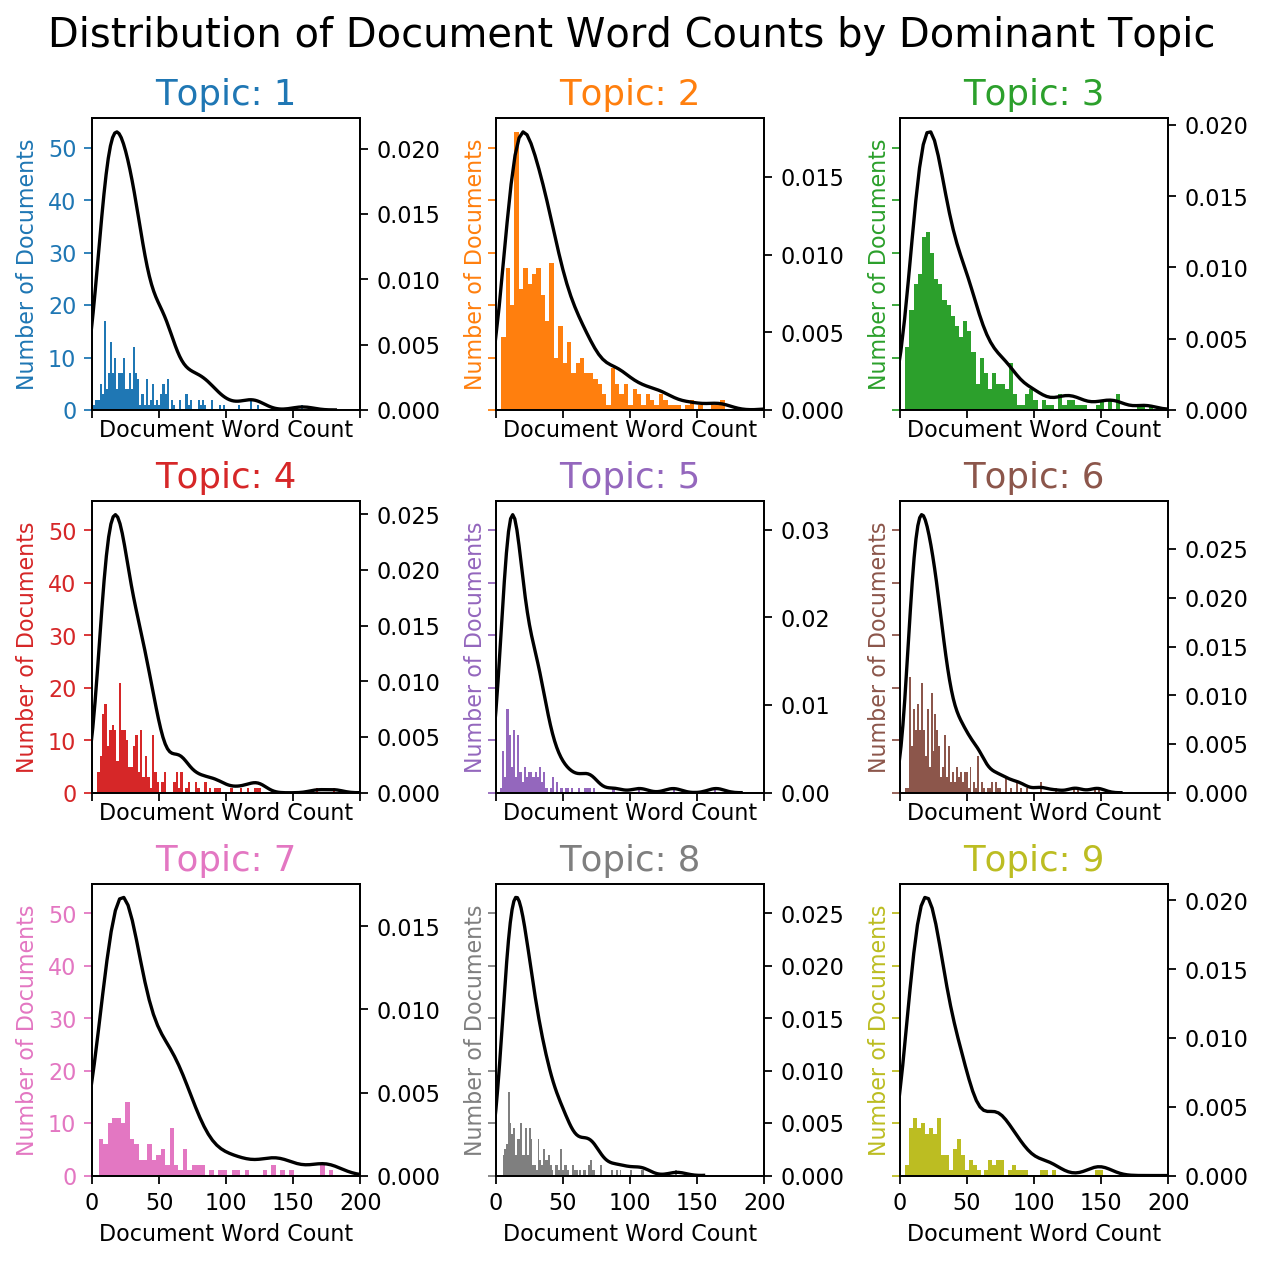

In [127]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(8,8), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 200), xlabel='Document Word Count')

    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i+1), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=18)
plt.show()

This is really unsurprising but sort of cool looking: we can see here that most reviews tend to be shorter, and so if you flag the dominant topic in a document you can see which topics dominate articles of different lengths. There's not really much to be surprised about, except that some topics like 7 and 9, do not cluster so strongly at the shorter end of the review spectrum. Let's compare 7 and 2:

In [130]:
df_dominant_topic.loc[df_dominant_topic['Dominant_Topic'] == 2].head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
8,8,2.0,0.4168,"nail, time, day, come, service, work, say, goo...","[absolutely, unique, nail, far, Charlotte, Nc,..."
37,37,2.0,0.5326,"nail, time, day, come, service, work, say, goo...","[soon, walk, salon, stare, greet, lady, great,..."
66,66,2.0,0.8426,"nail, time, day, come, service, work, say, goo...","[fit, bride, clean, mother, wedding, dress, si..."
89,89,2.0,0.7721,"nail, time, day, come, service, work, say, goo...","[today, Andrew, come, far, west, valley, clear..."
122,122,2.0,0.5985,"nail, time, day, come, service, work, say, goo...","[decide, nail, Sang, try, usually, metered, st..."


In [190]:
df_dominant_topic.loc[df_dominant_topic['Dominant_Topic'] == 7].sort_values('Document_No').head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
90,90,7.0,0.2870,"time, go, food, get, service, ask, good, order...","[meet, Ryan, tree, backyard, courteous, advise..."
153,153,7.0,0.4239,"time, go, food, get, service, ask, good, order...","[time, tho, bit, drive, definitely, worth, foo..."
176,176,7.0,0.2779,"time, go, food, get, service, ask, good, order...","[restaurant, family, go, enjoy, weekend, lunch..."
199,199,7.0,0.4299,"time, go, food, get, service, ask, good, order...","[great, new, Terminal, 3, handle, internationa..."
206,206,7.0,0.5896,"time, go, food, get, service, ask, good, order...","[location, manager, guy, rude, bad, ugly, atti..."


In [132]:
# Looks like 2 is about nails and beauty treatments, 7 seems to be more about food, service, and ordering

# I wonder if topic 2 reviews tend to be shorter because you get more of them, people pound them out while getting their pedicure maybe? While topic 7 you would write this review after your meal
# so only really nice or really bad meals make a big enough impression to write a review

In [194]:
# I can try to add dominant topics to our yelp df:

dom_tops = df_dominant_topic[['Document_No', 'Dominant_Topic']].values

for item in dom_tops:
    index = item[0]
    topic = item[1]
    yelp.at[index, 'topic'] = topic

In [235]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,lemmas,lemma_text,topic
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, Lo...",beware fake fake fake small business Los Alami...,14.0
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, service, quick, staff, fri...",come lunch Togo service quick staff friendly s...,21.0
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, foot, Circus, Circus, , ...",Vegas dozen time foot Circus Circus reason r...,19.0
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, good, actually, guy...",go night close street good actually guy table ...,8.0
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3.5, 4, star, bad, $, 12.99, lunch, senior, 1...",3.5 4 star bad $ 12.99 lunch senior 15 pay e...,8.0


In [315]:
topic_stars = pd.crosstab(index=yelp['stars'], columns=yelp['topic'], normalize='columns')
topic_stars

topic,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0
stars,,,,,,,,,,,,,,,,,,,,,
1,0.014354,0.133047,0.213043,0.045455,0.045113,0.044164,0.061224,0.258883,0.105263,0.159420,...,0.214765,0.051020,0.064935,0.125000,0.180000,0.200,0.012195,0.030151,0.037657,0.208511
2,0.052632,0.120172,0.054348,0.011364,0.037594,0.015773,0.074830,0.091371,0.127820,0.050725,...,0.147651,0.016327,0.025974,0.041667,0.060000,0.175,0.021341,0.030151,0.029289,0.123404
3,0.110048,0.180258,0.060870,0.045455,0.165414,0.022082,0.224490,0.121827,0.135338,0.050725,...,0.147651,0.059184,0.097403,0.027778,0.113333,0.100,0.057927,0.130653,0.158996,0.187234
4,0.296651,0.283262,0.078261,0.159091,0.195489,0.097792,0.333333,0.111675,0.360902,0.224638,...,0.214765,0.161224,0.292208,0.375000,0.206667,0.150,0.280488,0.291457,0.359833,0.242553
5,0.526316,0.283262,0.593478,0.738636,0.556391,0.820189,0.306122,0.416244,0.270677,0.514493,...,0.275168,0.712245,0.519481,0.430556,0.440000,0.375,0.628049,0.517588,0.414226,0.238298


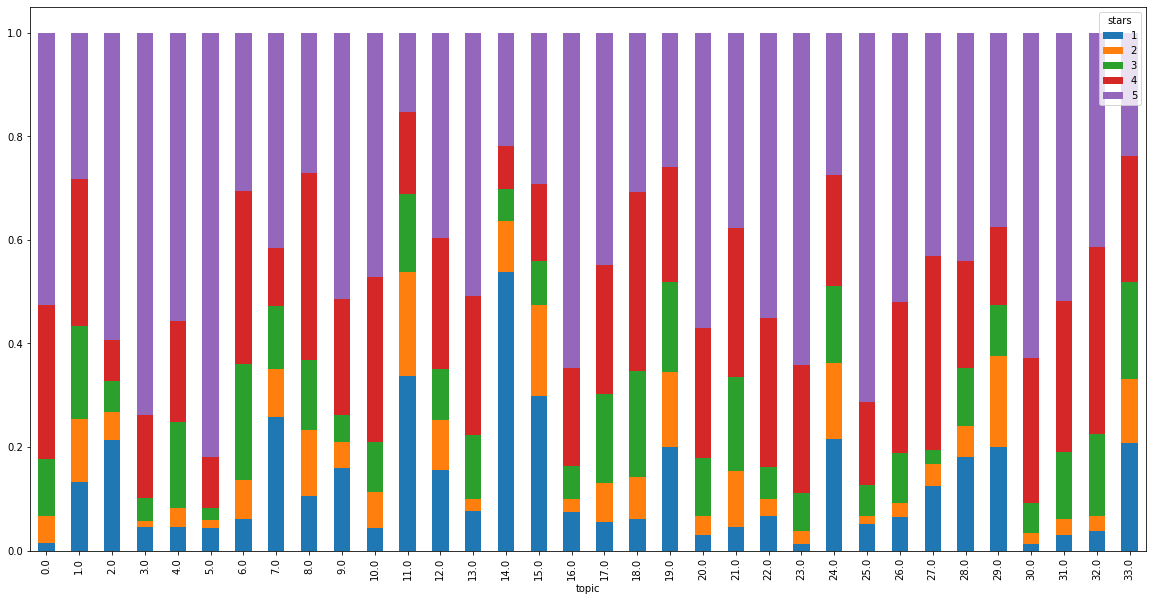

In [334]:
topic_stars.T.plot(kind="bar", figsize=(20,10), stacked=True);

In [338]:
yelp.loc[yelp['topic'] == 5]['text'] 

18      Had purchased a Groupon for a massage from Mar...
62      Stopped in after wife's medical appointment. J...
68      I have worked with PJs Flowers for several yea...
100     This is an awesome place!!! First of all the y...
110     The whole team at Ric's Auto were fantastic!  ...
130     Dr Tafreshi and his staff are nothing short of...
187     Kacy makes this location worth any drive!! Her...
253     They have the best customer service I've ever ...
297     I truly don't understand any negative reviews ...
319     I have taken almost 20 classes here and I love...
373     Gabby was the nerds bees knees. We negotiated ...
420     Dr. Woolf has been so amazing! I was starting ...
440     I started training with Damian 13 years ago. H...
454     Deanna is amazing!!! She did my first braid in...
464     Don't let the location fool you! Located next ...
481     I have been taking my dogs here for years and ...
512     We have been with Dr. Death for about 2 years ...
561     It's n

# Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [339]:
# I'm going to try to use column transformer to add more features to our dataset
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,lemmas,lemma_text,topic
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, Lo...",beware fake fake fake small business Los Alami...,14.0
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, service, quick, staff, fri...",come lunch Togo service quick staff friendly s...,21.0
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, foot, Circus, Circus, , ...",Vegas dozen time foot Circus Circus reason r...,19.0
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, good, actually, guy...",go night close street good actually guy table ...,8.0
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3.5, 4, star, bad, $, 12.99, lunch, senior, 1...",3.5 4 star bad $ 12.99 lunch senior 15 pay e...,8.0


In [164]:
# this did not work for some reason...
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# create preprocessing pipelines for ordinal, onehot and bow
ordinal_features = ['cool', 'funny', 'useful']
ordinal_transformer = Pipeline([('ord', OrdinalEncoder(dtype='int'))])

one_hot_features = ['user_id', 'business_id']
one_hot_transformer = Pipeline([('hot', OneHotEncoder(dtype='int'))])

nlp_features = 'lemma_text'
nlp_transformer = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_features=5000))])

# put them all together in a pre-processor
preprocessor = ColumnTransformer(
    transformers=[
#         ('ord_tran', ordinal_transformer, ordinal_features),
#         ('hot_tran', one_hot_transformer, one_hot_features),
        ('nlp_tran', nlp_transformer, nlp_features)], remainder='drop')

In [167]:
X = yelp['lemma_text']
y = yelp['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [340]:
preprocessor.fit(X_train)

IndexError: tuple index out of range

In [ ]:
# append to prediction pipeline
column_pipe = Pipeline([('preprocessor', preprocessor), ('clf', SGDClassifier(max_iter=5))])

# X = yelp.drop(columns=['date', 'review_id', 'stars', 'text', 'lemmas'])


column_pipe.fit(X_train, y_train)
print("model score: %.3f" % column_pipe.score(X_test, y_test))
# pipe = Pipeline([('vect', vect), ('clf', clf)]) clf = SGDClassifier(max_iter=5)

In [ ]:
# first attempt


# column_trans = ColumnTransformer(
#     [('useful_ord', OrdinalEncoder(dtype='int'), ['useful']),
#      ('cool_ord', OrdinalEncoder(dtype='int'), ['cool']),
#      ('funny_ord', OrdinalEncoder(dtype='int'), ['funny']),
#      ('user_onehot', OneHotEncoder(dtype='int'), ['user_id']),
#     ('review_bow', TfidfVectorizer(stop_words='english', max_features=5000), 'lemma_text')],
#     remainder='drop')

# column_pipe = Pipeline([('ct', column_trans), ('clf', clf)])


In [136]:
column_pipe.fit(X_train, y_train)



IndexError: tuple index out of range